In [1]:
#Importing Required Libraries 
import numpy as np
import pandas as pd                               
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\gayat\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Path of the Dataset
folder1=r"D:\TY_ET_C\Sem 6\CV\CP\Dataset1\Rural"
folder2=r"D:\TY_ET_C\Sem 6\CV\CP\Dataset1\Urban"

In [3]:
#folder1 (Rural)
i=0
for filename in os.listdir(folder1):
    #Defining the path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize total  image size to 200 x 200
    resize=(200,200)
    img=cv2.resize(a,resize)
    
    #grayscaling the image dataset
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(img2)
    #kernels for prewitt edge detection
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) 
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    #Horizontal 
    img_prewittx = cv2.filter2D(equ, -1, kernelx)
    img_prewitty = cv2.filter2D(equ, -1, kernely)
    #Vertical
    img_prewitt = img_prewittx + img_prewitty

    #Applying Brisk Discriptor folder1 (Rural)
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
  
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
  
    #drop first coloumn as it's the no of feature detected. Not required.
    #Append the data to folder1.csv file
    csv_data=out.to_csv('folder1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (1702, 64)
descriptor shape  1  :  (105, 64)
descriptor shape  2  :  (146, 64)
descriptor shape  3  :  (770, 64)
descriptor shape  4  :  (493, 64)
descriptor shape  5  :  (1587, 64)
descriptor shape  6  :  (1318, 64)
descriptor shape  7  :  (1927, 64)
descriptor shape  8  :  (779, 64)
descriptor shape  9  :  (1391, 64)
descriptor shape  10  :  (807, 64)
descriptor shape  11  :  (1186, 64)
descriptor shape  12  :  (1238, 64)
descriptor shape  13  :  (1144, 64)
descriptor shape  14  :  (666, 64)
descriptor shape  15  :  (1348, 64)
descriptor shape  16  :  (1725, 64)
descriptor shape  17  :  (671, 64)
descriptor shape  18  :  (593, 64)
descriptor shape  19  :  (1466, 64)
descriptor shape  20  :  (1000, 64)
descriptor shape  21  :  (1052, 64)
descriptor shape  22  :  (1570, 64)
descriptor shape  23  :  (899, 64)
descriptor shape  24  :  (1835, 64)
descriptor shape  25  :  (1772, 64)
descriptor shape  26  :  (1519, 64)
descriptor shape  27  :  (879, 64)
descriptor sh

descriptor shape  227  :  (846, 64)
descriptor shape  228  :  (928, 64)
descriptor shape  229  :  (694, 64)
descriptor shape  230  :  (848, 64)
descriptor shape  231  :  (727, 64)
descriptor shape  232  :  (703, 64)
descriptor shape  233  :  (756, 64)
descriptor shape  234  :  (888, 64)
descriptor shape  235  :  (463, 64)
descriptor shape  236  :  (566, 64)
descriptor shape  237  :  (559, 64)
descriptor shape  238  :  (569, 64)
descriptor shape  239  :  (1056, 64)
descriptor shape  240  :  (1040, 64)
descriptor shape  241  :  (735, 64)
descriptor shape  242  :  (589, 64)
descriptor shape  243  :  (882, 64)
descriptor shape  244  :  (1024, 64)
descriptor shape  245  :  (2304, 64)
descriptor shape  246  :  (1274, 64)
descriptor shape  247  :  (1541, 64)
descriptor shape  248  :  (1377, 64)
descriptor shape  249  :  (1242, 64)
descriptor shape  250  :  (1209, 64)
descriptor shape  251  :  (1191, 64)
descriptor shape  252  :  (1165, 64)
descriptor shape  253  :  (1002, 64)
descriptor shape

descriptor shape  451  :  (1319, 64)
descriptor shape  452  :  (1318, 64)
descriptor shape  453  :  (172, 64)
descriptor shape  454  :  (1434, 64)
descriptor shape  455  :  (1366, 64)
descriptor shape  456  :  (1480, 64)
descriptor shape  457  :  (1345, 64)
descriptor shape  458  :  (280, 64)
descriptor shape  459  :  (415, 64)
descriptor shape  460  :  (1876, 64)
descriptor shape  461  :  (925, 64)
descriptor shape  462  :  (526, 64)
descriptor shape  463  :  (782, 64)
descriptor shape  464  :  (1286, 64)
descriptor shape  465  :  (1668, 64)
descriptor shape  466  :  (1580, 64)
descriptor shape  467  :  (1014, 64)
descriptor shape  468  :  (1488, 64)
descriptor shape  469  :  (1549, 64)
descriptor shape  470  :  (1375, 64)
descriptor shape  471  :  (624, 64)
descriptor shape  472  :  (931, 64)
descriptor shape  473  :  (593, 64)
descriptor shape  474  :  (1340, 64)
descriptor shape  475  :  (1420, 64)
descriptor shape  476  :  (2032, 64)
descriptor shape  477  :  (1113, 64)
descriptor

descriptor shape  676  :  (919, 64)
descriptor shape  677  :  (938, 64)
descriptor shape  678  :  (1013, 64)
descriptor shape  679  :  (950, 64)
descriptor shape  680  :  (866, 64)
descriptor shape  681  :  (775, 64)
descriptor shape  682  :  (642, 64)
descriptor shape  683  :  (538, 64)
descriptor shape  684  :  (523, 64)
descriptor shape  685  :  (1194, 64)
descriptor shape  686  :  (1365, 64)
descriptor shape  687  :  (1284, 64)
descriptor shape  688  :  (846, 64)
descriptor shape  689  :  (1438, 64)
descriptor shape  690  :  (1421, 64)
descriptor shape  691  :  (1547, 64)
descriptor shape  692  :  (1873, 64)
descriptor shape  693  :  (1814, 64)
descriptor shape  694  :  (1606, 64)
descriptor shape  695  :  (1544, 64)
descriptor shape  696  :  (1238, 64)
descriptor shape  697  :  (969, 64)
descriptor shape  698  :  (897, 64)
descriptor shape  699  :  (824, 64)
descriptor shape  700  :  (1050, 64)
descriptor shape  701  :  (1217, 64)
descriptor shape  702  :  (1417, 64)
descriptor sh

descriptor shape  901  :  (1325, 64)
descriptor shape  902  :  (1780, 64)
descriptor shape  903  :  (1779, 64)
descriptor shape  904  :  (261, 64)
descriptor shape  905  :  (275, 64)
descriptor shape  906  :  (1032, 64)
descriptor shape  907  :  (298, 64)
descriptor shape  908  :  (313, 64)
descriptor shape  909  :  (184, 64)
descriptor shape  910  :  (779, 64)
descriptor shape  911  :  (779, 64)
descriptor shape  912  :  (193, 64)
descriptor shape  913  :  (218, 64)
descriptor shape  914  :  (255, 64)
descriptor shape  915  :  (304, 64)
descriptor shape  916  :  (384, 64)
descriptor shape  917  :  (690, 64)
descriptor shape  918  :  (681, 64)
descriptor shape  919  :  (1039, 64)
descriptor shape  920  :  (1016, 64)
descriptor shape  921  :  (1175, 64)
descriptor shape  922  :  (1127, 64)
descriptor shape  923  :  (1177, 64)
descriptor shape  924  :  (1420, 64)
descriptor shape  925  :  (1339, 64)
descriptor shape  926  :  (1282, 64)
descriptor shape  927  :  (1145, 64)
descriptor shap

In [5]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,251,223,231,235,193,71,6,0,8,...,224,46,2,240,137,0,64,62,191,30
1,180,9,64,104,111,79,24,65,0,0,...,249,173,122,195,64,0,126,26,0,128
2,148,104,95,32,168,27,128,127,127,122,...,137,131,112,151,143,1,0,0,80,240
3,31,252,239,27,241,127,34,128,205,145,...,132,212,247,41,16,250,18,204,237,207
4,3,64,28,2,139,187,127,28,188,184,...,251,255,9,8,255,255,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355721,4,232,95,3,1,224,119,0,0,128,...,0,72,103,159,13,166,177,12,153,58
2355722,176,59,215,239,224,215,1,3,0,0,...,2,0,4,139,230,255,191,142,153,59
2355723,252,31,227,44,32,64,64,0,0,128,...,223,112,5,0,220,239,27,0,209,50
2355724,148,123,199,239,239,223,1,7,0,0,...,34,48,31,253,255,127,30,143,29,50


In [6]:
# folder2(Urban)
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize all images to 200 x 200
    resize=(100,100)
    img=cv2.resize(a,resize)
    #grayscling the images 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     #gaussian Image
    img2= cv2.GaussianBlur(gray,(5,5),0)
   
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    #kernels for prewitt edge detection
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) 
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    #Horizontal
    img_prewittx = cv2.filter2D(equ, -1, kernelx) 
    #Vertical
    img_prewitty = cv2.filter2D(equ, -1, kernely)
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder2.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (294, 64)
descriptor shape  1  :  (254, 64)
descriptor shape  2  :  (199, 64)
descriptor shape  3  :  (177, 64)
descriptor shape  4  :  (275, 64)
descriptor shape  5  :  (163, 64)
descriptor shape  6  :  (126, 64)
descriptor shape  7  :  (246, 64)
descriptor shape  8  :  (119, 64)
descriptor shape  9  :  (257, 64)
descriptor shape  10  :  (310, 64)
descriptor shape  11  :  (169, 64)
descriptor shape  12  :  (279, 64)
descriptor shape  13  :  (258, 64)
descriptor shape  14  :  (282, 64)
descriptor shape  15  :  (239, 64)
descriptor shape  16  :  (178, 64)
descriptor shape  17  :  (234, 64)
descriptor shape  18  :  (298, 64)
descriptor shape  19  :  (287, 64)
descriptor shape  20  :  (156, 64)
descriptor shape  21  :  (264, 64)
descriptor shape  22  :  (229, 64)
descriptor shape  23  :  (246, 64)
descriptor shape  24  :  (205, 64)
descriptor shape  25  :  (216, 64)
descriptor shape  26  :  (245, 64)
descriptor shape  27  :  (196, 64)
descriptor shape  28  :  (203,

descriptor shape  232  :  (193, 64)
descriptor shape  233  :  (230, 64)
descriptor shape  234  :  (246, 64)
descriptor shape  235  :  (266, 64)
descriptor shape  236  :  (150, 64)
descriptor shape  237  :  (138, 64)
descriptor shape  238  :  (267, 64)
descriptor shape  239  :  (248, 64)
descriptor shape  240  :  (172, 64)
descriptor shape  241  :  (189, 64)
descriptor shape  242  :  (196, 64)
descriptor shape  243  :  (187, 64)
descriptor shape  244  :  (265, 64)
descriptor shape  245  :  (260, 64)
descriptor shape  246  :  (220, 64)
descriptor shape  247  :  (99, 64)
descriptor shape  248  :  (231, 64)
descriptor shape  249  :  (231, 64)
descriptor shape  250  :  (271, 64)
descriptor shape  251  :  (197, 64)
descriptor shape  252  :  (198, 64)
descriptor shape  253  :  (167, 64)
descriptor shape  254  :  (228, 64)
descriptor shape  255  :  (239, 64)
descriptor shape  256  :  (258, 64)
descriptor shape  257  :  (188, 64)
descriptor shape  258  :  (210, 64)
descriptor shape  259  :  (23

descriptor shape  462  :  (135, 64)
descriptor shape  463  :  (190, 64)
descriptor shape  464  :  (307, 64)
descriptor shape  465  :  (142, 64)
descriptor shape  466  :  (200, 64)
descriptor shape  467  :  (228, 64)
descriptor shape  468  :  (80, 64)
descriptor shape  469  :  (242, 64)
descriptor shape  470  :  (309, 64)
descriptor shape  471  :  (140, 64)
descriptor shape  472  :  (221, 64)
descriptor shape  473  :  (148, 64)
descriptor shape  474  :  (123, 64)
descriptor shape  475  :  (224, 64)
descriptor shape  476  :  (204, 64)
descriptor shape  477  :  (231, 64)
descriptor shape  478  :  (121, 64)
descriptor shape  479  :  (77, 64)
descriptor shape  480  :  (138, 64)
descriptor shape  481  :  (162, 64)
descriptor shape  482  :  (197, 64)
descriptor shape  483  :  (182, 64)
descriptor shape  484  :  (159, 64)
descriptor shape  485  :  (160, 64)
descriptor shape  486  :  (159, 64)
descriptor shape  487  :  (189, 64)
descriptor shape  488  :  (220, 64)
descriptor shape  489  :  (243

descriptor shape  693  :  (204, 64)
descriptor shape  694  :  (114, 64)
descriptor shape  695  :  (215, 64)
descriptor shape  696  :  (190, 64)
descriptor shape  697  :  (184, 64)
descriptor shape  698  :  (224, 64)
descriptor shape  699  :  (213, 64)
descriptor shape  700  :  (181, 64)
descriptor shape  701  :  (194, 64)
descriptor shape  702  :  (198, 64)
descriptor shape  703  :  (173, 64)
descriptor shape  704  :  (145, 64)
descriptor shape  705  :  (166, 64)
descriptor shape  706  :  (180, 64)
descriptor shape  707  :  (197, 64)
descriptor shape  708  :  (186, 64)
descriptor shape  709  :  (178, 64)
descriptor shape  710  :  (176, 64)
descriptor shape  711  :  (56, 64)
descriptor shape  712  :  (138, 64)
descriptor shape  713  :  (198, 64)
descriptor shape  714  :  (205, 64)
descriptor shape  715  :  (188, 64)
descriptor shape  716  :  (217, 64)
descriptor shape  717  :  (291, 64)
descriptor shape  718  :  (315, 64)
descriptor shape  719  :  (303, 64)
descriptor shape  720  :  (29

descriptor shape  922  :  (193, 64)
descriptor shape  923  :  (116, 64)
descriptor shape  924  :  (125, 64)
descriptor shape  925  :  (110, 64)
descriptor shape  926  :  (239, 64)
descriptor shape  927  :  (239, 64)
descriptor shape  928  :  (209, 64)
descriptor shape  929  :  (219, 64)
descriptor shape  930  :  (224, 64)
descriptor shape  931  :  (155, 64)
descriptor shape  932  :  (257, 64)
descriptor shape  933  :  (254, 64)
descriptor shape  934  :  (315, 64)
descriptor shape  935  :  (317, 64)
descriptor shape  936  :  (229, 64)
descriptor shape  937  :  (235, 64)
descriptor shape  938  :  (100, 64)
descriptor shape  939  :  (71, 64)
descriptor shape  940  :  (82, 64)
descriptor shape  941  :  (104, 64)
descriptor shape  942  :  (130, 64)
descriptor shape  943  :  (137, 64)
descriptor shape  944  :  (169, 64)
descriptor shape  945  :  (177, 64)
descriptor shape  946  :  (305, 64)
descriptor shape  947  :  (341, 64)
descriptor shape  948  :  (290, 64)
descriptor shape  949  :  (290

In [7]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data2= pd.read_csv('folder2.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,176,123,207,225,109,192,0,0,0,128,...,2,32,12,253,255,53,223,79,137,223
1,248,159,227,77,64,240,108,50,163,4,...,202,208,230,235,32,144,125,8,1,250
2,188,217,255,255,255,223,0,1,129,130,...,4,236,190,111,0,186,50,197,255,255
3,254,141,251,116,122,255,62,0,128,128,...,3,2,192,254,255,28,77,192,255,114
4,225,255,239,193,192,224,97,6,134,12,...,206,246,199,0,248,1,201,255,239,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408183,203,191,231,145,208,240,249,183,4,13,...,215,223,119,253,103,182,0,0,16,16
408184,180,3,215,101,2,2,4,115,80,102,...,237,255,255,255,55,22,7,0,0,192
408185,123,196,186,86,19,32,198,234,250,17,...,42,48,255,127,120,48,92,6,2,198
408186,176,59,199,237,79,192,73,103,2,14,...,255,159,225,254,61,154,4,0,112,48


In [8]:
#append all the class wise feature descriptor data into one data frame
data=data1.append(data2)

data

C:\Users\gayat\AppData\Local\Temp\ipykernel_2968\3613364136.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,251,223,231,235,193,71,6,0,8,...,224,46,2,240,137,0,64,62,191,30
1,180,9,64,104,111,79,24,65,0,0,...,249,173,122,195,64,0,126,26,0,128
2,148,104,95,32,168,27,128,127,127,122,...,137,131,112,151,143,1,0,0,80,240
3,31,252,239,27,241,127,34,128,205,145,...,132,212,247,41,16,250,18,204,237,207
4,3,64,28,2,139,187,127,28,188,184,...,251,255,9,8,255,255,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408183,203,191,231,145,208,240,249,183,4,13,...,215,223,119,253,103,182,0,0,16,16
408184,180,3,215,101,2,2,4,115,80,102,...,237,255,255,255,55,22,7,0,0,192
408185,123,196,186,86,19,32,198,234,250,17,...,42,48,255,127,120,48,92,6,2,198
408186,176,59,199,237,79,192,73,103,2,14,...,255,159,225,254,61,154,4,0,112,48


In [9]:
#save appended data into a csv file
csv_data=data.to_csv('finalData.csv', mode='a', header=False,index=False)

In [10]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,251,223,231,235,193,71,6,0,8,...,224,46,2,240,137,0,64,62,191,30
1,180,9,64,104,111,79,24,65,0,0,...,249,173,122,195,64,0,126,26,0,128
2,148,104,95,32,168,27,128,127,127,122,...,137,131,112,151,143,1,0,0,80,240
3,31,252,239,27,241,127,34,128,205,145,...,132,212,247,41,16,250,18,204,237,207
4,3,64,28,2,139,187,127,28,188,184,...,251,255,9,8,255,255,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145866,203,191,231,145,208,240,249,183,4,13,...,215,223,119,253,103,182,0,0,16,16
4145867,180,3,215,101,2,2,4,115,80,102,...,237,255,255,255,55,22,7,0,0,192
4145868,123,196,186,86,19,32,198,234,250,17,...,42,48,255,127,120,48,92,6,2,198
4145869,176,59,199,237,79,192,73,103,2,14,...,255,159,225,254,61,154,4,0,112,48


In [11]:
#Applying Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [12]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [13]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([1246263, 1483248, 1416360], dtype=int64), array([0, 1, 2, 3])) 



In [14]:
#performing kmeans prediction on the folder1 with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100,100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    
    #append the dataframe into the array 
    data.append(hist[0])
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1.csv', mode='a',header=False,index=False)

.trashed-1679510297-Screenshot_2023-02-20-22-50-11-09_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510350-Screenshot_2023-02-20-22-22-46-30_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510355-Screenshot_2023-02-20-22-22-44-42_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510432-Screenshot_2023-02-14-10-57-04-70_c1ebbaff44ba152fb7f7c2e1f7129fd1.jpg
.trashed-1679510433-Screenshot_2023-02-14-10-58-04-75_c1ebbaff44ba152fb7f7c2e1f7129fd1.jpg
.trashed-1679510433-Screenshot_2023-02-14-10-58-37-93_c1ebbaff44ba152fb7f7c2e1f7129fd1.jpg
.trashed-1679510444-Screenshot_2023-02-20-23-25-08-66_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679511302-Screenshot_2023-02-20-23-25-57-38_64ef5fc2000c1caa954c114bb372e1d5.jpg
Img 101.jpg
Img 102.jpg
Img 103.jpg
Img 104.jpg
Img 105.jpg
Img 106.jpg
Img 107.jpg
Img 111.jpg
Img 112.jpg
Img 114.jpg
Img 115.jpg
Img 116.jpg
Img 118.jpg
Img 119.jpg
Img 120.jpg
Img 121.jpg
Img 122.jpg
Img 127.jpg
Img 128.jpg
Img 129.jpg
Img 130.jpg
Img 131.jpg
Img 132.

Screenshot_2023-02-14-12-26-55-83_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-28-15-18.jpg
Screenshot_2023-02-14-12-28-39-87.jpg
Screenshot_2023-02-14-12-29-22-28.jpg
Screenshot_2023-02-14-12-29-33-14.jpg
Screenshot_2023-02-14-12-29-35-48.jpg
Screenshot_2023-02-14-12-29-48-11.jpg
Screenshot_2023-02-14-12-29-49-96.jpg
Screenshot_2023-02-14-12-29-51-68.jpg
Screenshot_2023-02-14-12-29-53-73.jpg
Screenshot_2023-02-14-12-29-54-29_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-29-58-12.jpg
Screenshot_2023-02-14-12-29-58-18_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-30-09-75.jpg
Screenshot_2023-02-14-12-30-13-68.jpg
Screenshot_2023-02-14-12-30-17-68.jpg
Screenshot_2023-02-14-12-30-19-31.jpg
Screenshot_2023-02-14-12-30-20-94.jpg
Screenshot_2023-02-14-12-30-23-32.jpg
Screenshot_2023-02-14-12-30-26-96.jpg
Screenshot_2023-02-14-12-30-29-21.jpg
Screenshot_2023-02-14-12-30-33-38.jpg
Screenshot_2023-02-14-12-30-36-50.jpg
Screenshot_2023-02-14-12-30

Screenshot_2023-02-20-22-52-29-51_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-22-58-53-61_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-22-58-55-82_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-12-49-69_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-12-51-71_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-00-32_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-01-91_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-28-39_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-34-51_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-36-04_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-44-83_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-13-47-93_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-15-06-18_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-23-15-07-79_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screen

Screenshot_2023-02-21-15-25-05-89_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-25-07-01_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-18-36_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-20-35_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-26-29_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-29-46_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-34-11_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-39-12_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-41-15_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-45-37_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-26-53-03_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-27-05-41_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-27-10-39_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-15-27-14-69_f9ee0578fe1cc94de7482bd41accb329.jpg
Screen

Screenshot_2023-04-10-17-31-12-15_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-15-15_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-18-35_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-21-16_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-23-89_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-25-69_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-28-13_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-36-90_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-31-58-52_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-32-12-13_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-32-26-88_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-32-30-58_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-32-32-43_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-17-32-41-60_f9ee0578fe1cc94de7482bd41accb329.jpg
Screen

Screenshot_2023-04-10-19-18-30-08_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-44-37_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-45-51_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-50-55_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-51-74_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-53-56_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-54-56_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-57-00_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-19-58-57_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-20-00-83_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-20-02-68_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-20-04-44_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-20-06-24_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-04-10-19-20-22-73_f9ee0578fe1cc94de7482bd41accb329.jpg
Screen

In [15]:
#performing kmeans prediction on the folder2 with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100,100)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder2.csv', mode='a',header=False,index=False)

.trashed-1679510037-Screenshot_2023-02-20-15-28-51-04_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510075-Screenshot_2023-02-20-15-43-42-70_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510088-Screenshot_2023-02-20-15-28-18-26_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510097-Screenshot_2023-02-20-15-46-56-36_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510103-Screenshot_2023-02-20-15-29-43-55_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510120-Screenshot_2023-02-20-15-56-38-16_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510140-Screenshot_2023-02-20-15-39-43-53_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510151-Screenshot_2023-02-20-15-39-57-01_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510177-Screenshot_2023-02-20-16-01-06-43_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510209-Screenshot_2023-02-20-16-04-04-14_64ef5fc2000c1caa954c114bb372e1d5.jpg
.trashed-1679510256-Screenshot_2023-02-20-15-22-27-70_64ef5fc2000c1caa954c114bb372e1d5.jpg

Screenshot_2023-02-14-12-36-06-67_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-36-10-34_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-36-30-46_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-36-38-03_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-36-53-72_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-36-59-47_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-37-02-72_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-37-45-43_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-37-51-90_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-37-56-86_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-37-59-24.jpg
Screenshot_2023-02-14-12-38-08-66_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-38-43-50.jpg
Screenshot_2023-02-14-12-39-04-44_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-14-12-39-11-01_64ef5fc2000c1caa954c114bb372e1d5.jpg
S

Screenshot_2023-02-20-15-41-50-05_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-27-61_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-30-03_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-32-32_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-34-38_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-38-15_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-39-82_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-48-72_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-43-50-44_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-44-24-38_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-44-29-10_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-44-32-13_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-46-04-51_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-15-46-11-93_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screen

Screenshot_2023-02-20-16-05-18-94_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-05-23-01_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-05-25-53_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-05-38-00_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-06-40-48_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-06-49-09_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-06-51-65_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-01-84_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-04-38_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-07-92_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-19-22_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-35-53_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-42-26_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screenshot_2023-02-20-16-07-48-57_64ef5fc2000c1caa954c114bb372e1d5.jpg
Screen

Screenshot_2023-02-21-13-29-06-62_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-10-22_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-12-26_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-15-98_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-18-48_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-28-04_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-30-82_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-36-28_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-38-70_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-40-63_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-42-65_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-44-42_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-49-92_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-29-51-65_f9ee0578fe1cc94de7482bd41accb329.jpg
Screen

Screenshot_2023-02-21-13-47-08-80_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-11-01_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-17-05_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-24-55_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-26-70_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-31-30_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-34-29_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-47-38-42_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-48-42-55_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-48-44-64_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-48-46-24_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-48-49-54_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-48-55-70_f9ee0578fe1cc94de7482bd41accb329.jpg
Screenshot_2023-02-21-13-48-58-25_f9ee0578fe1cc94de7482bd41accb329.jpg
Screen

Screenshot_2023-04-10-17-40-31-18.jpg
Screenshot_2023-04-10-17-44-04-83.jpg
Screenshot_2023-04-10-17-51-28-80.jpg
Screenshot_2023-04-10-17-51-32-47.jpg
Screenshot_2023-04-10-17-52-14-16.jpg
Screenshot_2023-04-10-17-53-19-17.jpg
Screenshot_2023-04-10-17-53-21-18.jpg
Screenshot_2023-04-10-17-53-23-42.jpg
Screenshot_2023-04-10-17-54-11-72.jpg
Screenshot_2023-04-10-17-54-35-26.jpg
Screenshot_2023-04-10-17-54-35-94.jpg
Screenshot_2023-04-10-17-54-37-69.jpg
Screenshot_2023-04-10-17-54-39-36.jpg
Screenshot_2023-04-10-17-57-33-71.jpg
Screenshot_2023-04-10-17-57-52-23.jpg
Screenshot_2023-04-10-17-57-53-71.jpg
Screenshot_2023-04-10-17-57-55-44.jpg
Screenshot_2023-04-10-17-58-07-32.jpg
Screenshot_2023-04-10-17-58-20-21.jpg
Screenshot_2023-04-10-17-58-21-11.jpg
Screenshot_2023-04-10-17-58-22-78.jpg
Screenshot_2023-04-10-17-58-24-34.jpg
Screenshot_2023-04-10-17-59-29-97.jpg
Screenshot_2023-04-10-18-03-38-96.jpg
Screenshot_2023-04-10-18-03-39-30.jpg
Screenshot_2023-04-10-18-03-45-72.jpg
Screenshot_2

In [16]:
#Displaying the kmeans predicted data of folder1
print("Rural")
dat1= pd.read_csv('finalFolder1.csv',header=None)
print(dat1)

Rural
           0      1      2      3      4      5      6  7
0     152619  27508  23135  20790  20759  20900  44451  0
1       9479   4006   4035   4692   5428   6706  17488  0
2       1091    314    329    388    459    553   1922  0
3       2114   1112   1369   2100   2923   3937  12621  0
4          0      0      0      0      0      0      0  0
...      ...    ...    ...    ...    ...    ...    ... ..
1995    2008    593    485    505    564    615   1523  0
1996    1673    490    463    433    466    485   1177  0
1997    1107    375    228    164    151    179    384  0
1998    1174    348    162    100    104    109    314  0
1999    1067    344    238    132    136    160    395  0

[2000 rows x 8 columns]


In [17]:
#Displaying the kmeans predicted data of folder2
print("Urban")
dat2= pd.read_csv('finalFolder2.csv',header=None)
print(dat2)

Urban
           0      1      2      3      4      5      6  7
0       5716   1326   1400   1668   2239   3021   8548  1
1     254113   5842   9794   1318   1191    835    948  1
2       8992   2711   2610   2800   2967   3152   7185  1
3      39596  18397  16661  17534  19470  21323  48703  1
4      25902   9866   6337   5586   5663   6148  14171  1
...      ...    ...    ...    ...    ...    ...    ... ..
1995   86815  11503  11624  12242  12622  12381  29532  1
1996    2921    677    691    583    656    666   1335  1
1997    3134    859    933   1074   1275   1644   3789  1
1998    3890    732    756    736    813    861   1799  1
1999     743    133    119    114    108    112    205  1

[2000 rows x 8 columns]


In [18]:
#appending All kmeans predicted data into 1 dataframe
A = dat1.append(dat2)
A

C:\Users\gayat\AppData\Local\Temp\ipykernel_2968\2424071763.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = dat1.append(dat2)


,0,1,2,3,4,5,6,7
0,152619,27508,23135,20790,20759,20900,44451,0
1,9479,4006,4035,4692,5428,6706,17488,0
2,1091,314,329,388,459,553,1922,0
3,2114,1112,1369,2100,2923,3937,12621,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1995,86815,11503,11624,12242,12622,12381,29532,1
1996,2921,677,691,583,656,666,1335,1
1997,3134,859,933,1074,1275,1644,3789,1
1998,3890,732,756,736,813,861,1799,1


In [19]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [20]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF.csv",header=None)
A

,0,1,2,3,4,5,6,7
0,152619,27508,23135,20790,20759,20900,44451,0
1,9479,4006,4035,4692,5428,6706,17488,0
2,1091,314,329,388,459,553,1922,0
3,2114,1112,1369,2100,2923,3937,12621,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7995,86815,11503,11624,12242,12622,12381,29532,1
7996,2921,677,691,583,656,666,1335,1
7997,3134,859,933,1074,1275,1644,3789,1
7998,3890,732,756,736,813,861,1799,1


In [21]:
df=A

In [22]:
df

,0,1,2,3,4,5,6,7
0,152619,27508,23135,20790,20759,20900,44451,0
1,9479,4006,4035,4692,5428,6706,17488,0
2,1091,314,329,388,459,553,1922,0
3,2114,1112,1369,2100,2923,3937,12621,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7995,86815,11503,11624,12242,12622,12381,29532,1
7996,2921,677,691,583,656,666,1335,1
7997,3134,859,933,1074,1275,1644,3789,1
7998,3890,732,756,736,813,861,1799,1


In [23]:
rows,columns=df.shape

In [24]:
df.shape

(8000, 8)

In [25]:
df.head()

,0,1,2,3,4,5,6,7
0,152619,27508,23135,20790,20759,20900,44451,0
1,9479,4006,4035,4692,5428,6706,17488,0
2,1091,314,329,388,459,553,1922,0
3,2114,1112,1369,2100,2923,3937,12621,0
4,0,0,0,0,0,0,0,0


In [26]:
df.tail()

,0,1,2,3,4,5,6,7
7995,86815,11503,11624,12242,12622,12381,29532,1
7996,2921,677,691,583,656,666,1335,1
7997,3134,859,933,1074,1275,1644,3789,1
7998,3890,732,756,736,813,861,1799,1
7999,743,133,119,114,108,112,205,1


In [27]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [28]:
df.describe()

,0,1,2,3,4,5,6,7
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000
mean,3.880936e+05,2.825608e+04,1.917567e+04,1.929257e+04,1.845688e+04,2.048752e+04,4.391928e+04,0.500000
std,5.826447e+05,1.617003e+05,6.878099e+04,7.998369e+04,6.155829e+04,7.312280e+04,1.571665e+05,0.500031
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.363250e+03,8.200000e+02,7.560000e+02,5.972500e+02,7.937500e+02,7.367500e+02,1.627750e+03,0.000000
50%,3.948350e+04,4.167500e+03,3.741500e+03,2.990000e+03,3.308000e+03,3.568000e+03,9.067000e+03,0.500000
75%,6.924218e+05,1.271800e+04,1.149550e+04,1.158000e+04,1.273775e+04,1.358875e+04,3.383200e+04,1.000000
max,5.544033e+06,2.799530e+06,1.196838e+06,2.287379e+06,1.373911e+06,1.578593e+06,3.895555e+06,1.000000


In [29]:
X = df.drop(columns= 7, axis=1)

In [30]:
Y = df[7]

In [31]:
X

,0,1,2,3,4,5,6
0,152619,27508,23135,20790,20759,20900,44451
1,9479,4006,4035,4692,5428,6706,17488
2,1091,314,329,388,459,553,1922
3,2114,1112,1369,2100,2923,3937,12621
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
7995,86815,11503,11624,12242,12622,12381,29532
7996,2921,677,691,583,656,666,1335
7997,3134,859,933,1074,1275,1644,3789
7998,3890,732,756,736,813,861,1799


In [32]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
7995    1
7996    1
7997    1
7998    1
7999    1
Name: 7, Length: 8000, dtype: int64

#### Train and split

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.30, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (5600, 7)
Number transactions y_train dataset:  (5600,)
Number transactions X_test dataset:  (2400, 7)
Number transactions y_test dataset:  (2400,)


In [34]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

Applying Random Forest

Results obtained on Training Data

Accuracy on Train data :  0.9976785714285714

Presion : 0.984006734006734

Recall : 1.0

F1 score :  0.9919389053882054

Results obtained on Testing Data

Accuracy on Test data :  0.9920833333333333

Presion : 0.984006734006734

Recall : 1.0

F1 score :  0.9919389053882054


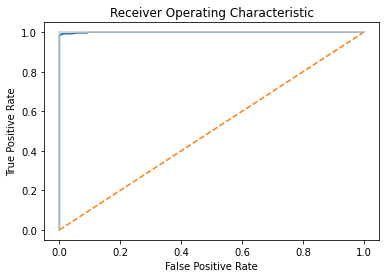

In [35]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##

# plot_confusion_matrix(modelRF, X_test, Y_test) 
# plt.title('Confusion matrix')
# plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print("\033[1m"+'Applying Random Forest'+'\033[0m')

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('\n' +"\033[1m"+ 'Results obtained on Training Data'+'\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))

# Accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\n'+ "\033[1m"+ 'Results obtained on Testing Data'+ '\033[0m')

print('\nAccuracy on Test data : ', test_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))


## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Results obtained on Training Data

Accuracy on Train data :  0.8125

Presion : 0.984006734006734

Recall : 1.0

F1 score :  0.9919389053882054

Results obtained on Testing Data

Accuracy on Test data :  0.8008333333333333

Presion : 0.734006734006734

Recall : 0.8433268858800773

F1 score :  0.7848784878487849


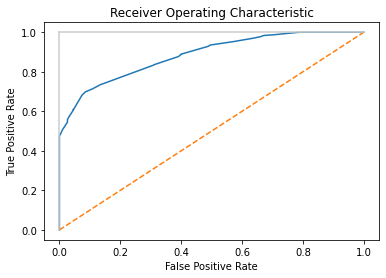

In [36]:
modelDT = DecisionTreeClassifier(max_depth=9)
modelDT.fit(X_train,Y_train)

## produce a confusion matrix ##
# plot_confusion_matrix(modelDT, X_test, Y_test) 
# plt.title('Confusion matrix')
# plt.show() 

# accuracy on training data
X_train_prediction = modelDT.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print('\n' +"\033[1m"+ 'Results obtained on Training Data'+'\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))

# Accuracy on test data
X_test_prediction = modelDT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\n'+ "\033[1m"+ 'Results obtained on Testing Data'+ '\033[0m')

print('\nAccuracy on Test data : ', test_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))


## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelDT.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Results obtained on Training Data

Accuracy on Train data :  0.9507142857142857

Presion : 0.734006734006734

Recall : 0.8433268858800773

F1 score :  0.7848784878487849

Results obtained on Testing Data

Accuracy on Test data :  0.8583333333333333

Presion : 0.8526936026936027

Recall : 0.8599320882852292

F1 score :  0.8562975486052409


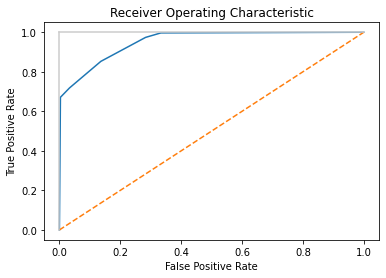

In [37]:
#knn
modelknn=KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# plot_confusion_matrix(modelknn, X_test, Y_test)
# plt.title('Confusion matrix')
# plt.show()
# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print('\n' +"\033[1m"+ 'Results obtained on Training Data'+'\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\n'+ "\033[1m"+ 'Results obtained on Testing Data'+ '\033[0m')

print('\nAccuracy on Test data : ', test_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))


## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelknn.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-fold

In [38]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
#Loading the dataset
df = pd.read_csv("FinalF.csv",header=None) 
#df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
X

,0,1,2,3,4,5,6
0,152619,27508,23135,20790,20759,20900,44451
1,9479,4006,4035,4692,5428,6706,17488
2,1091,314,329,388,459,553,1922
3,2114,1112,1369,2100,2923,3937,12621
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
7995,86815,11503,11624,12242,12622,12381,29532
7996,2921,677,691,583,656,666,1335
7997,3134,859,933,1074,1275,1644,3789
7998,3890,732,756,736,813,861,1799


In [41]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7995    1
7996    1
7997    1
7998    1
7999    1
Name: 7, Length: 8000, dtype: int64

### Random forest

In [64]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelRF1 = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelRF1.fit(X_train,y_train)
    pred_values = modelRF1.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelRF1, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()
# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
# mean_accuracy = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('\nAverage accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))


# # produce a ROC plot ##
# # obtain prediction probabilities
# y_prob = modelRF1.predict_proba(X_test)
# #calculate false & true positive rates
# fpr,tpr,_ = roc_curve(y_test, y_prob[:,1])
# #construct plot
# plt.plot(fpr,tpr)
# plt.title('Receiver Operating Characteristic')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

accuracy of each fold - [0.996875, 0.99875, 0.9975, 0.996875, 0.99625]

Average accuracy : 0.99725
Mean accuracy: 1.00 +/- 0.00
Precision : 0.8526936026936027
Recall : 0.8599320882852292
F1 score :  0.8562975486052409


### Decision Tree

In [44]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelDT1 = DecisionTreeClassifier(max_depth=9)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelDT1.fit(X_train,y_train)
    pred_values = modelDT1.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelDT1, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()

# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

accuracy of each fold - [0.81875, 0.82, 0.799375, 0.8225, 0.72]
Average accuracy : 0.796125
Mean accuracy: 0.80 +/- 0.00
Precision : 0.8526936026936027
Recall : 0.8599320882852292
F1 score :  0.8562975486052409


### SVM

In [82]:
k = 3
kf = KFold(n_splits=k, random_state=None)
modelSVM = SVC(kernel='linear', C=1)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelSVM.fit(X_train,y_train)
    pred_values = modelSVM.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
plot_confusion_matrix(modelSVM, X_test, y_test)
plt.title('Confusion matrix')
plt.show()

# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

### Logistic regression

In [56]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelLR = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelLR.fit(X_train,y_train)
    pred_values = modelLR.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelLR, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()
 # calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

# ## produce a ROC plot ##
# #obtain prediction probabilities
# y_prob = modelLR.predict_proba(X_test)
# #calculate false & true positive rates
# fpr,tpr,_ = roc_curve(y_test, y_prob[:,1])
# #construct plot
# plt.plot(fpr,tpr)
# plt.title('Receiver Operating Characteristic')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

accuracy of each fold - [0.384375, 0.3825, 0.4875, 0.266875, 0.161875]
Average accuracy : 0.336625
Mean accuracy: 0.34 +/- 0.00
Precision : 0.8526936026936027
Recall : 0.8599320882852292
F1 score :  0.8562975486052409


### keighbours

In [60]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelknc=KNeighborsClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelknc.fit(X_train,y_train)
    pred_values = modelknc.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelknc, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()

# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

accuracy of each fold - [0.9982502187226596, 0.9965004374453194, 0.9965004374453194, 0.9991251093613298, 0.9597550306211724, 0.9965004374453194, 0.8739054290718039]
Average accuracy : 0.9743624428732748
Mean accuracy: 0.97 +/- 0.00
Precision : 0.8526936026936027
Recall : 0.8599320882852292
F1 score :  0.8562975486052409


### Image prediction

descriptor shape:  (2, 32)


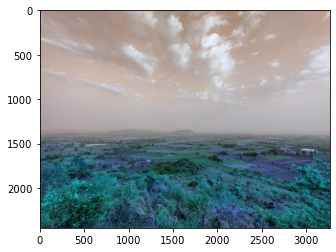

In [61]:
#assigning path with any class image
path = r"D:\TY_ET_C\Sem 6\CV\CP\testing imgs\IMG20210523064930.jpg"
input_image = cv2.imread(path)
plt.imshow(input_image, cmap='gray')

data=[]
   
#resize image
resize=(256,256)
img=cv2.resize(input_image,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray, kp)

out=pd.DataFrame(descriptors)
print('descriptor shape: ', out.shape)
out = out.astype(np.uint8)
hist=np.histogram(input_image,bins=[0,1,2,3,4,5,6,7])
#append the dataframe into the array 
data.append(hist[0])

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)

In [62]:
pred = modelRF1.predict(Output)

print(pred)

[0]


This is  a Rural image 


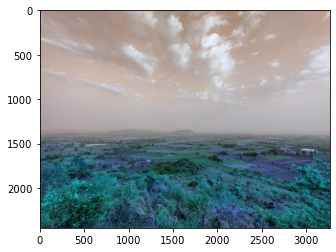

In [63]:
if pred == 0:
    print('This is  a Rural image ')
    plt.imshow(input_image, cmap='gray')

else:
    print('This is an Urban Image')
    plt.imshow(input_image, cmap='gray')

## End